# timestamp is the entry time of that webpage
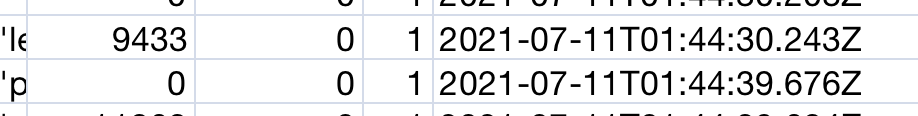

# I will calculate how long he stay on that page 
## I only count timestamp gaps that occur on the same day.
## If the gap between two timestamps is greater than 6hours, it will not be calculated.
## So every last record of each period will be 0, I will set it to NA to avoid affecting the average calculation.

In [1]:
import pandas as pd
import numpy as np
  
import time
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder

In [2]:
path = "C:\\Users\\mohus\\OneDrive\\Desktop\\iLab-2\\Dataset_final\\"

file1="Final.csv"

#path = "C:\\Users\\mohus\\OneDrive\\Desktop\\iLab-2\dataset (1)\dataset\\"

#file1="Cleaned_all_39000000_rows.csv"

df=pd.read_csv(path+file1,index_col=False)



In [3]:
df.head()

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,initialized,NaN,home,https://coles.hub.clearlrs.com,['home'],0.0,1.0,0,0,2021-07-06T02:08:30.004Z,NaN,-0.004
2,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,17.738
3,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,0.034
4,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,25.380


In [4]:
df.count()

actorId           39536930
verb              39536930
type              15499257
activity          39536930
activity_url      39536930
ancestors         39536930
completion        39070535
Is Manager        39487492
Is New Starter    39536930
Time Zone         39536930
timestamp         39536930
contained           203963
duration          39536930
dtype: int64

In [7]:
df.actorId.unique

<bound method Series.unique of 0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
              ...   
39536925    174732.0
39536926    174732.0
39536927    174733.0
39536928    174733.0
39536929    174733.0
Name: actorId, Length: 39536930, dtype: float64>

In [8]:
# Select the first 1000 actorIds
ID_number = 1000
df_1000 = df[df['actorId'] < ID_number]

# Drop home rows
df_1000 = df_1000.drop(df_1000[df_1000['activity'] == 'home'].index)

# sort by id and timestamp, reset index
df_1000 = df_1000.sort_values(['actorId', 'timestamp'],ascending = [True, True])
df_1000.reset_index(inplace=True)
df_1000 = df_1000.drop(["index"],axis = 1)

In [9]:
df_1000.count()

actorId           552927
verb              552927
type              170935
activity          552927
activity_url      552927
ancestors         552927
completion        546731
Is Manager        536412
Is New Starter    552927
Time Zone         552927
timestamp         552927
contained           8782
duration          552927
dtype: int64

In [10]:
def get_list(actor_id,df_1000):
    time_list = df_1000[df_1000.actorId == actor_id].timestamp.to_list()
    duration_list = []
    for n in range(0,len(time_list)):
        if n == len(time_list)-1:
            duration_list.append(pd.NA)
            break
            
        date1 = np.array( [ float(i) for i in time_list[n].split('T')[0].split("-")] )
        date2 = np.array( [ float(i) for i in time_list[n+1].split('T')[0].split("-")] )
        
        if (date1==date2).all():
            time1 = np.array( [ float(i) for i in time_list[n].split('T')[1][:-1].split(":")] )
            time2 = np.array( [ float(i) for i in time_list[n+1].split('T')[1][:-1].split(":")] )
            result = time2 - time1
            diff = result[0]*60 + result[1] + result[2]/60

            if diff > 360:
                duration_list.append(pd.NA)
                continue
            duration_list.append(round(diff,3))
            
        else:
            duration_list.append(pd.NA)
            
    return duration_list
    

In [11]:
all_list = []
for i in range(ID_number):
    all_list.extend(get_list(i,df_1000))

In [12]:
df_1000['Time duration'] = all_list
df_1000.to_csv('time.csv')
df_1000

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration,Time duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,0.000,<NA>
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,17.738,0.296
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,0.034,0.001
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,25.380,0.423
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0,0,2021-07-06T02:09:13.152Z,NaN,14.835,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552922,999.0,completed,module,activities,https://coles.clearlrs.com/activities/9cca1240...,['activities'],1.0,0.0,0,5,2021-10-15T12:39:42.605Z,NaN,9.409,0.157
552923,999.0,experienced,NaN,transcript,https://coles.hub.clearlrs.com/profile/transcript,"['home', 'profile', 'transcript']",0.0,0.0,0,5,2021-10-15T12:39:52.014Z,NaN,0.009,0.0
552924,999.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,0.0,0,5,2021-10-15T12:39:52.023Z,NaN,0.000,<NA>
552925,999.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,0.0,0,5,2022-06-21T07:56:41.943Z,NaN,0.003,1.18


In [3]:
#df_1000.to_excel(excel_writer="C:\\Users\\mohus\\OneDrive\\Desktop\\iLab-2\\Dataset_final\\time_duration.xlsx",
          #index = True)

In [2]:
df0=pd.read_excel("C:\\Users\\mohus\\OneDrive\\Desktop\\iLab-2\\Dataset_final\\time_duration.xlsx")

In [3]:
df0.head()

,Unnamed: 0,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration,Time duration
0,0,0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,0.000,NaN
1,1,0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,17.738,0.296
2,2,0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,0.034,0.001
3,3,0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,25.380,0.423
4,4,0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0,0,2021-07-06T02:09:13.152Z,NaN,14.835,0.247


In [4]:
df0.verb.unique() #<---------Display unique value of the selected variable

array(['completed', 'experienced', 'searched', 'viewed', 'registered',
       'rated', 'launched', 'assigned', 'passed', 'suspended', 'removed',
       'selected', 'failed', 'unregistered', 'shared', 'remove',
       'terminated', 'updated', 'scored', 'earned', 'complete',
       'attempted'], dtype=object)

In [5]:
df0.activity.unique() #<---------Display unique value of the selected variable

array(['activities', 'learning', 'notifications', 'profile', 'explore',
       'search', 'results', 'team', 'dashboard', 'overdue', 'due-soon',
       'others', 'tasks', 'transcript', 'brand', 'learningseat_course',
       'course_id', 'category', 'colesplay', 'photo', 'events'],
      dtype=object)

In [5]:
df_4=df0[['verb','activity','Is Manager', 'Time duration']] # <---------segmentation with feature names

In [6]:
df_4.reset_index(inplace=False)

,index,verb,activity,Is Manager,Time duration
0,0,completed,activities,1.0,NaN
1,1,experienced,learning,1.0,0.296
2,2,experienced,notifications,1.0,0.001
3,3,experienced,profile,1.0,0.423
4,4,experienced,explore,1.0,0.247
...,...,...,...,...,...
552922,552922,completed,activities,0.0,0.157
552923,552923,experienced,transcript,0.0,0.000
552924,552924,experienced,profile,0.0,NaN
552925,552925,experienced,learning,0.0,1.180


In [117]:
#sns.set_style("white")
#n1= plt.hist(df0['Time duration'], bins=10)

In [7]:
# Filtering out 'assigned' from 'verb' 

df_4 = df_4[~df_4['verb'].str.contains('assigned')]

In [120]:
df_4.verb.unique()

array(['completed', 'experienced', 'searched', 'viewed', 'registered',
       'rated', 'launched', 'passed', 'suspended', 'removed', 'selected',
       'failed', 'unregistered', 'shared', 'remove', 'terminated',
       'updated', 'scored', 'earned', 'complete', 'attempted'],
      dtype=object)

In [8]:
# Filtering manager out from the df_4
manager = 1
df_4 = df_4[df_4['Is Manager'] != manager]

In [9]:
# Filtering out time with less than 0.3 seconds
time = 0.3
df_4 = df_4[df_4['Time duration'] > time]

In [10]:
df_4.head()

,verb,activity,Is Manager,Time duration
15400,experienced,learning,0.0,273.998
15401,experienced,learning,0.0,12.249
15402,completed,activities,0.0,0.322
15403,rated,activities,0.0,21.999
15405,completed,activities,0.0,0.408


In [11]:
# Using the right= argument to modify binning behavior
df_4['Time_bin'] = pd.cut(
    df_4['Time duration'], 
    [0, 5, 10, 15, 20, 500], 
    labels=['1-5 minute', '6-10 minute','11-15 minute','15-20 minute', 'Greater than 20 minutes'],
    right=False
)

In [12]:
df_4 = df_4.reset_index()

In [13]:
df_4.head()

,index,verb,activity,Is Manager,Time duration,Time_bin
0,15400,experienced,learning,0.0,273.998,Greater than 20 minutes
1,15401,experienced,learning,0.0,12.249,11-15 minute
2,15402,completed,activities,0.0,0.322,1-5 minute
3,15403,rated,activities,0.0,21.999,Greater than 20 minutes
4,15405,completed,activities,0.0,0.408,1-5 minute


In [14]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [15]:
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df_4[['Time_bin']]).toarray())

In [16]:
#merge one-hot encoded columns back with original DataFrame
final_df_4 = df_4.join(encoder_df)

In [17]:
#view final df
print(final_df_4)

        index         verb    activity  Is Manager  Time duration  \
0       15400  experienced    learning         0.0        273.998   
1       15401  experienced    learning         0.0         12.249   
2       15402    completed  activities         0.0          0.322   
3       15403        rated  activities         0.0         21.999   
4       15405    completed  activities         0.0          0.408   
...       ...          ...         ...         ...            ...   
82417  552907    completed  activities         0.0          0.316   
82418  552911    completed  activities         0.0          0.404   
82419  552913    completed  activities         0.0          0.410   
82420  552917    completed  activities         0.0          0.355   
82421  552925  experienced    learning         0.0          1.180   

                      Time_bin    0    1    2    3    4  
0      Greater than 20 minutes  0.0  0.0  0.0  0.0  1.0  
1                 11-15 minute  0.0  1.0  0.0  0.0  0.0

In [125]:
#change verb as type to category for the readyness of the clustering
df_4['verb'] = df_4['verb'].astype('category')


In [126]:
#change verb as type to category for the readyness of the clustering

df_4['activity'] = df_4['activity'].astype('category')

In [127]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82422 entries, 15400 to 552925
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   verb           82422 non-null  category
 1   activity       82422 non-null  category
 2   Is Manager     74304 non-null  float64 
 3   Time duration  82422 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 2.0 MB


In [128]:
#Converting Activity categorial variable to numeric 'activity_code' to 

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df_4['activity_code'] = LE.fit_transform(df_4['activity'])

In [129]:
df_4.head()

,verb,activity,Is Manager,Time duration,activity_code
15400,experienced,learning,0.0,273.998,9
15401,experienced,learning,0.0,12.249,9
15402,completed,activities,0.0,0.322,0
15403,rated,activities,0.0,21.999,0
15405,completed,activities,0.0,0.408,0


In [130]:
df_4.reset_index()

,index,verb,activity,Is Manager,Time duration,activity_code
0,15400,experienced,learning,0.0,273.998,9
1,15401,experienced,learning,0.0,12.249,9
2,15402,completed,activities,0.0,0.322,0
3,15403,rated,activities,0.0,21.999,0
4,15405,completed,activities,0.0,0.408,0
...,...,...,...,...,...,...
82417,552907,completed,activities,0.0,0.316,0
82418,552911,completed,activities,0.0,0.404,0
82419,552913,completed,activities,0.0,0.410,0
82420,552917,completed,activities,0.0,0.355,0


In [142]:
df_4.tail(10)

,verb,activity,Is Manager,Time duration,activity_code
552890,completed,activities,0.0,0.677,0
552892,completed,activities,0.0,0.407,0
552895,experienced,learning,0.0,0.757,9
552899,completed,activities,0.0,0.375,0
552903,completed,activities,0.0,0.654,0
552907,completed,activities,0.0,0.316,0
552911,completed,activities,0.0,0.404,0
552913,completed,activities,0.0,0.410,0
552917,completed,activities,0.0,0.355,0
552925,experienced,learning,0.0,1.180,9


In [131]:
df_5=df_4[['activity', 'activity_code', 'Time duration']].reset_index(inplace=False) # <---------subsetting the dataframe

In [132]:
df_5.head()

,index,activity,activity_code,Time duration
0,15400,learning,9,273.998
1,15401,learning,9,12.249
2,15402,activities,0,0.322
3,15403,activities,0,21.999
4,15405,activities,0,0.408


In [94]:
df_5.activity_code.unique()

array([ 9,  0, 20, 16,  8,  5, 17, 15, 13,  4, 12, 14, 10,  1,  2, 11, 19,
       18,  3,  6,  7])

In [133]:
X = df_5.iloc[:, [2, 3]].values

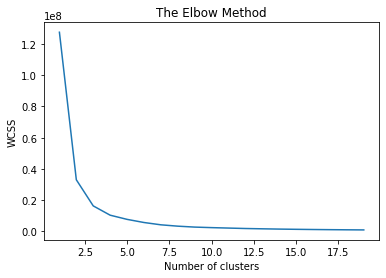

In [137]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [138]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [139]:
y_kmeans

array([4, 0, 0, ..., 0, 0, 0])

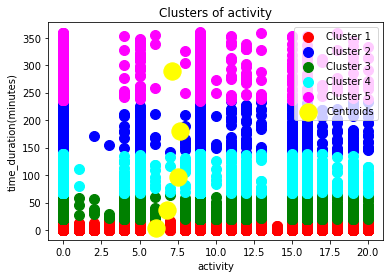

In [140]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of activity')
plt.xlabel('activity')
plt.ylabel('time_duration(minutes)')
plt.legend()
plt.show()

In [42]:
df_4.groupby(['verb']).agg({"Time duration": 'mean'})

,Time duration
verb,
assigned,9.140488
attempted,0.553000
complete,2.653450
completed,9.026492
earned,176.367500
experienced,18.024661
failed,7.383553
launched,10.692850
passed,5.823220


In [26]:
df_5=df_4.groupby(['verb']).agg({"Time duration": 'mean'})

In [31]:
df_5

,Time duration
verb,
assigned,12.788106
attempted,2.836750
complete,2.487348
completed,8.223478
earned,176.367500
experienced,17.969672
failed,6.657552
launched,11.425715
passed,5.847454


In [18]:

#fig = px.bar(df6, x='verb', y='Time duration')
#fig.show()

NameError: name 'df6' is not defined

In [19]:
#boxplot

#z = sns.lmplot(data=df6, x='verb', y='Time duration',\
              #fit_reg = False, hue='verb', size=8)